# COVID-19 Percent Positive in Italy

> Dot.sa Sandra Mazzoli & Max Pierini

Percent positive (**PP**), aka _Percent Positive Rate_ or _Positivity Rate_, can be considered as an index of disease transmission (ref: [Johns Hopkins](https://www.jhsph.edu/covid-19/articles/covid-19-testing-understanding-the-percent-positive.html)).

The index is calculated as

$$
\mathbf{PP} = \frac{ \Delta_\textrm{positive} }{ \Delta_\textrm{tested} }
$$

where $\Delta_\textrm{positive}$ is daily new amount of positive tests and $\Delta_\textrm{tested}$ is daily new amount of total tests.

When it's too high means that more tests are needed and/or pharmaceutical (PI) or non-pharmaceutical (NPI) interventions should be seriously considered to reduce transmission.

The "alarm threshold" has been established at 5%. World Health Organization recommend to relax COVID-19 NPI (lockdown and high level social distancing rules) if **PP** keeps below the threshold for at least two weeks.

We can add an "alert" threshold, between 3% and 5%: if **PP** raises over 3%, governments should consider a likely forthcoming alarm scenario. Below 3% can be considered in a safe area.

Percent positive index for Italy and italian regions is here calculated using Dipartimento di Protezione Civile published data (ref: [GitHub](https://github.com/pcm-dpc/COVID-19)) and smoothed with rolling mean (gaussian window of 7 days, $\sigma=2$).

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, Markdown

In [43]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv",
     usecols=['data', 'denominazione_regione', 'nuovi_positivi', 'casi_testati'],
     parse_dates=['data'],
     index_col=['denominazione_regione', 'data'],
     squeeze=True).sort_index()

ko = df[df['casi_testati']>0]
countries = ko.index.get_level_values("denominazione_regione").unique().sort_values()
days = ko.index.get_level_values("data").unique()

# Index

- [Italy](#Italy)

In [55]:
index = "\n".join( f"- [{region}](#{region.replace(' ', '-')})" for region in countries )
display(Markdown(index))

- [Abruzzo](#Abruzzo)
- [Basilicata](#Basilicata)
- [Calabria](#Calabria)
- [Campania](#Campania)
- [Emilia-Romagna](#Emilia-Romagna)
- [Friuli Venezia Giulia](#Friuli-Venezia-Giulia)
- [Lazio](#Lazio)
- [Liguria](#Liguria)
- [Lombardia](#Lombardia)
- [Marche](#Marche)
- [Molise](#Molise)
- [P.A. Bolzano](#P.A.-Bolzano)
- [P.A. Trento](#P.A.-Trento)
- [Piemonte](#Piemonte)
- [Puglia](#Puglia)
- [Sardegna](#Sardegna)
- [Sicilia](#Sicilia)
- [Toscana](#Toscana)
- [Umbria](#Umbria)
- [Valle d'Aosta](#Valle-d'Aosta)
- [Veneto](#Veneto)

- [SUMMARY](#SUMMARY)

***

# Italy

In [2]:
it = pd.read_csv(
    "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv",
     usecols=['data', 'nuovi_positivi', 'totale_casi', 'casi_testati', 'tamponi'],
     parse_dates=['data'],
     index_col=['data'],
     squeeze=True).sort_index()

In [3]:
ok = it[it['casi_testati']>0]

## Plot

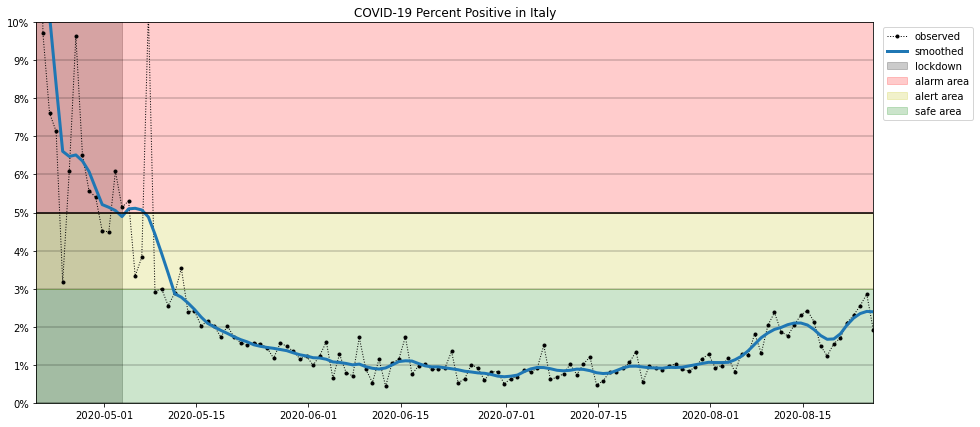

In [31]:
indice = ok['nuovi_positivi'][1:]*100 / ok['casi_testati'].diff()[1:]
smooth = indice.rolling(7,
                win_type='gaussian',
                min_periods=1,
                center=True).mean(std=2).values

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(indice, 'ok:', label="observed", lw=1, ms=3)
ax.plot(indice.index, smooth, lw=3, label="smoothed")

ax.hlines(np.arange(0,15,1), indice.index[0], indice.index[-1], color="k", alpha=.2)

ax.axhline(5, c="k")

ax.fill_betweenx(
    [0,20],
    indice.index[indice.index>=pd.to_datetime("2020-03-11")][0],
    indice.index[indice.index<=pd.to_datetime("2020-05-04")][-1],
    color="k", alpha=.2, label="lockdown"
)

ax.fill_between(indice.index, 5, 20, color="r", alpha=.2, label="alarm area")
ax.fill_between(indice.index, 3, 5, color="y", alpha=.2, label="alert area")
ax.fill_between(indice.index, 0, 3, color="g", alpha=.2, label="safe area")


ax.set_yticks(np.arange(0,15,1))
ax.set_yticklabels([f"{p:.0%}" for p in np.arange(0,.15,.01)])
ax.set_ylim(0, 10)
ax.set_xlim(indice.index[0], indice.index[-1])
ax.legend(loc="upper right", bbox_to_anchor=(1.125,1))
ax.set_title("COVID-19 Percent Positive in Italy")
plt.show();

## Last week data

In [41]:
idf = pd.DataFrame({
    "date":indice.index[-7:],
    "observed PP":indice.values[-7:],
    "smoothed PP":smooth[-7:]
})
idf.set_index('date', inplace=True)
display(HTML(idf[::-1].to_html()))

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,5.419533,5.450680
2020-08-24 17:00:00,5.453179,5.464386
2020-08-23 17:00:00,5.471450,5.482333
2020-08-22 17:00:00,5.501028,5.505696
2020-08-21 17:00:00,5.533168,5.537567
2020-08-20 17:00:00,5.566634,5.571280
2020-08-19 17:00:00,5.608919,5.605804


***

# Abruzzo

## Plot

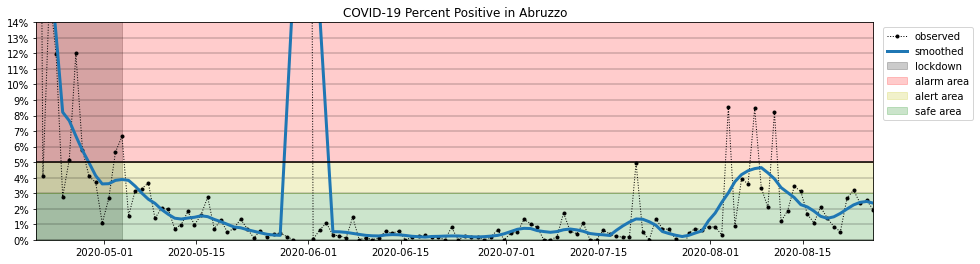

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.923077,2.358158
2020-08-24 17:00:00,2.547771,2.469039
2020-08-23 17:00:00,2.348993,2.411814
2020-08-22 17:00:00,3.200000,2.246023
2020-08-21 17:00:00,2.671312,1.983966
2020-08-20 17:00:00,0.521512,1.701114
2020-08-19 17:00:00,0.852619,1.479849


***

# Basilicata

## Plot

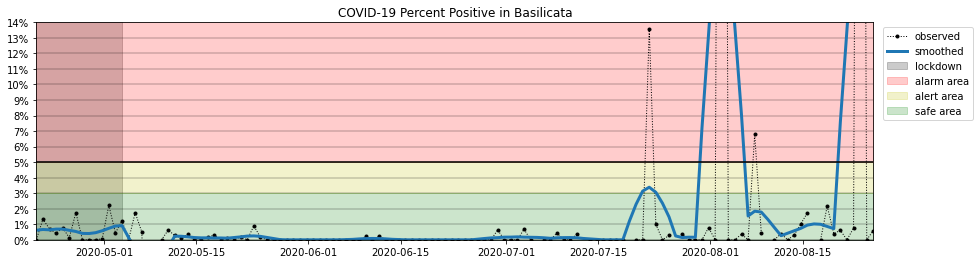

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,0.597610,21.855639
2020-08-24 17:00:00,0.000000,24.142004
2020-08-23 17:00:00,100.000000,23.525363
2020-08-22 17:00:00,0.751880,19.383199
2020-08-21 17:00:00,0.000000,13.571001
2020-08-20 17:00:00,0.606061,7.605917
2020-08-19 17:00:00,0.400000,0.718668


***

# Calabria

## Plot

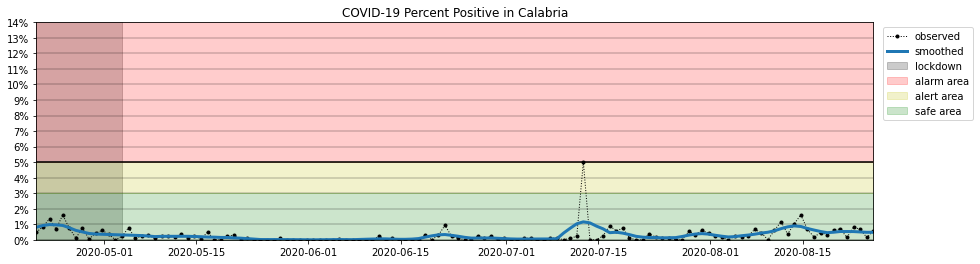

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,0.547196,0.484098
2020-08-24 17:00:00,0.157480,0.482193
2020-08-23 17:00:00,0.675676,0.507591
2020-08-22 17:00:00,0.819672,0.530044
2020-08-21 17:00:00,0.149254,0.529794
2020-08-20 17:00:00,0.688705,0.534885
2020-08-19 17:00:00,0.659631,0.488900


***

# Campania

## Plot

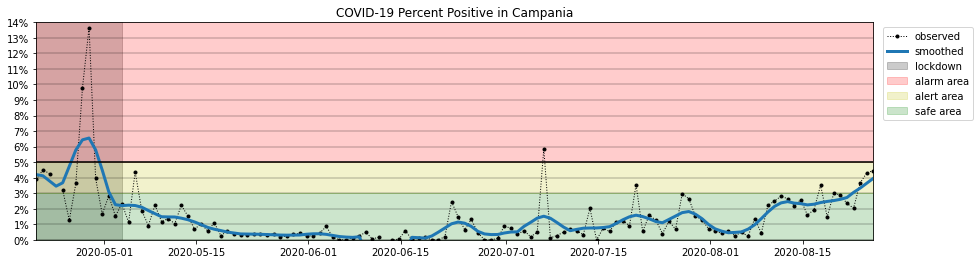

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,4.454487,3.958527
2020-08-24 17:00:00,4.305865,3.643165
2020-08-23 17:00:00,3.663393,3.327492
2020-08-22 17:00:00,2.038089,3.049903
2020-08-21 17:00:00,2.340203,2.722508
2020-08-20 17:00:00,2.877307,2.604881
2020-08-19 17:00:00,2.999464,2.526232


***

# Emilia-Romagna

## Plot

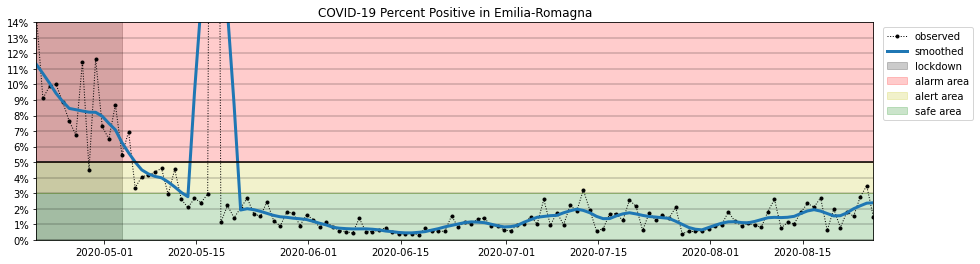

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.476602,2.384369
2020-08-24 17:00:00,3.483483,2.358506
2020-08-23 17:00:00,2.748918,2.186120
2020-08-22 17:00:00,1.511716,1.998145
2020-08-21 17:00:00,1.811354,1.735853
2020-08-20 17:00:00,0.784906,1.552161
2020-08-19 17:00:00,1.976593,1.537998


***

# Friuli Venezia Giulia

## Plot

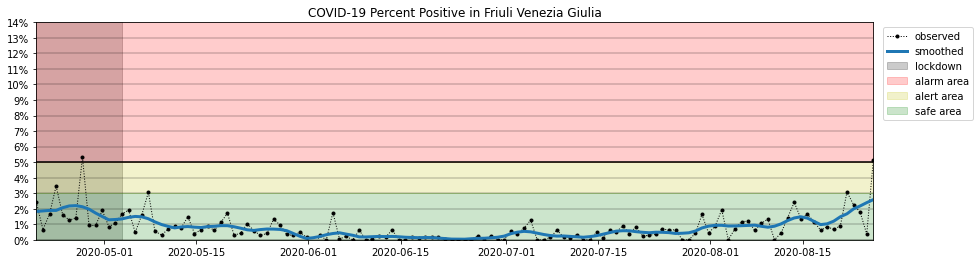

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,5.142857,2.586645
2020-08-24 17:00:00,0.366972,2.392732
2020-08-23 17:00:00,1.776462,2.178773
2020-08-22 17:00:00,2.260274,1.988370
2020-08-21 17:00:00,3.079555,1.673376
2020-08-20 17:00:00,0.900901,1.483522
2020-08-19 17:00:00,0.667071,1.200976


***

# Lazio

## Plot

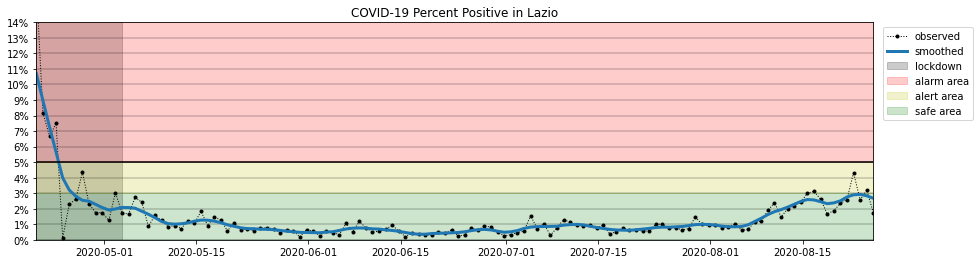

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.743902,2.674845
2020-08-24 17:00:00,3.199649,2.830990
2020-08-23 17:00:00,2.563745,2.926748
2020-08-22 17:00:00,4.323346,2.897905
2020-08-21 17:00:00,2.588813,2.755292
2020-08-20 17:00:00,2.347897,2.507497
2020-08-19 17:00:00,1.873595,2.375491


***

# Liguria

## Plot

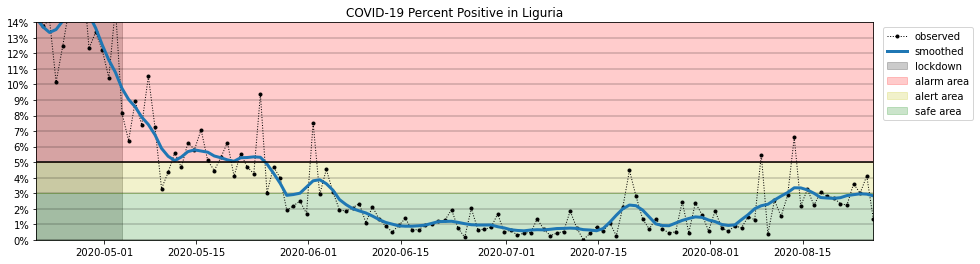

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.342282,2.831700
2020-08-24 17:00:00,4.113924,2.939875
2020-08-23 17:00:00,3.007519,2.961885
2020-08-22 17:00:00,3.605514,2.906426
2020-08-21 17:00:00,2.238806,2.847512
2020-08-20 17:00:00,2.316891,2.711256
2020-08-19 17:00:00,2.702703,2.667870


***

# Lombardia

## Plot

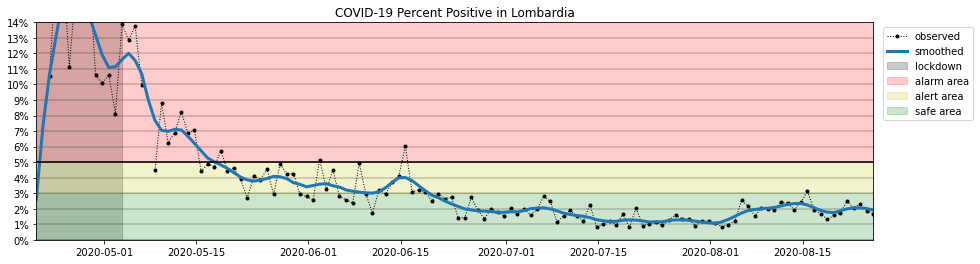

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.672993,1.914097
2020-08-24 17:00:00,1.868524,2.009670
2020-08-23 17:00:00,2.300732,2.057022
2020-08-22 17:00:00,2.058300,2.057589
2020-08-21 17:00:00,2.477574,1.992410
2020-08-20 17:00:00,1.747022,1.872576
2020-08-19 17:00:00,1.570861,1.750405


***

# Marche

## Plot

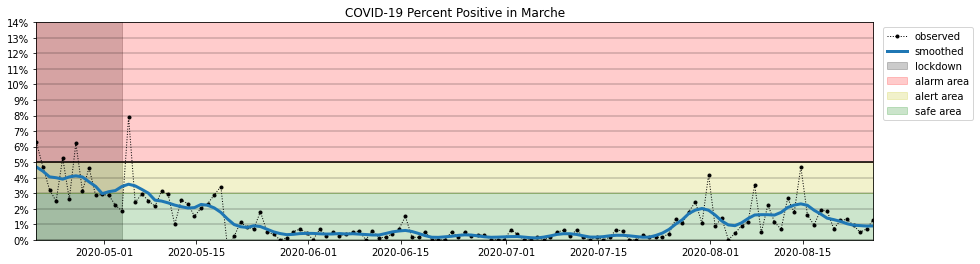

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.294118,0.893580
2020-08-24 17:00:00,0.710900,0.883963
2020-08-23 17:00:00,0.479846,0.910531
2020-08-22 17:00:00,0.929368,0.941053
2020-08-21 17:00:00,1.315789,1.035721
2020-08-20 17:00:00,1.254826,1.187999
2020-08-19 17:00:00,0.702811,1.298015


***

# Molise

## Plot

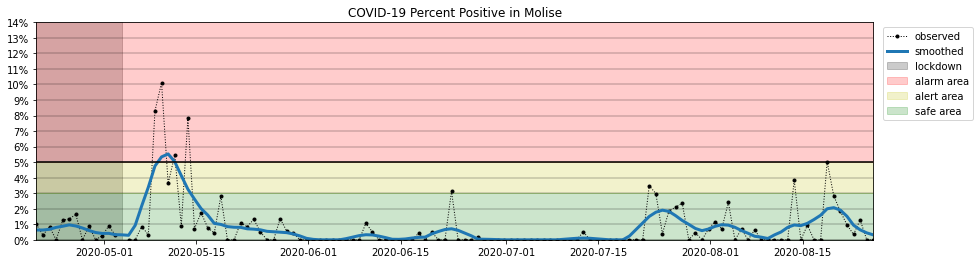

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,0.000000,0.316153
2020-08-24 17:00:00,0.000000,0.447143
2020-08-23 17:00:00,1.282051,0.642678
2020-08-22 17:00:00,0.344828,0.940935
2020-08-21 17:00:00,0.961538,1.514260
2020-08-20 17:00:00,1.834862,1.912386
2020-08-19 17:00:00,2.822581,2.069026


***

# P.A. Bolzano

## Plot

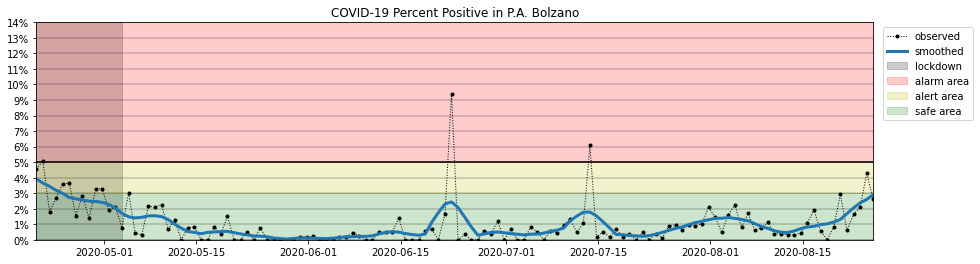

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,2.601156,2.910294
2020-08-24 17:00:00,4.285714,2.603332
2020-08-23 17:00:00,2.103560,2.374681
2020-08-22 17:00:00,1.630901,2.056014
2020-08-21 17:00:00,0.602410,1.687313
2020-08-20 17:00:00,2.924791,1.310860
2020-08-19 17:00:00,0.853659,1.144271


***

# P.A. Trento

## Plot

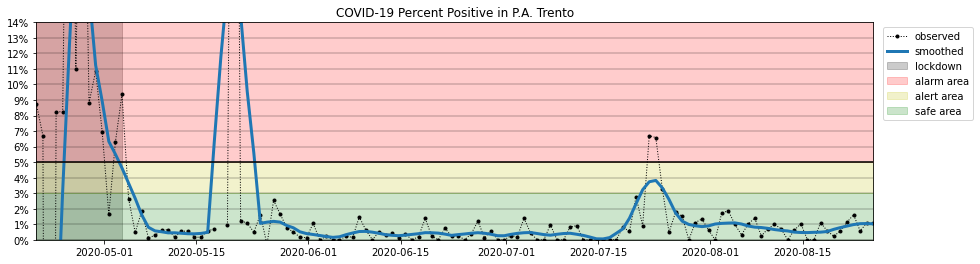

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.056338,1.025965
2020-08-24 17:00:00,1.086957,1.046836
2020-08-23 17:00:00,0.571429,1.037821
2020-08-22 17:00:00,1.615799,0.980325
2020-08-21 17:00:00,1.126761,0.881630
2020-08-20 17:00:00,0.568990,0.786593
2020-08-19 17:00:00,0.229621,0.674119


***

# Piemonte

## Plot

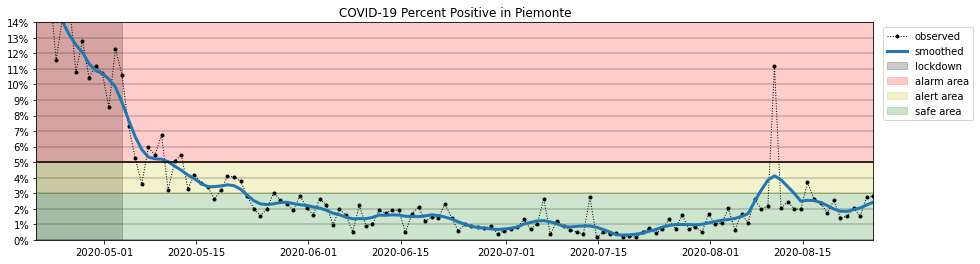

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,2.805118,2.423133
2020-08-24 17:00:00,2.758621,2.243864
2020-08-23 17:00:00,1.520087,2.049657
2020-08-22 17:00:00,2.021696,1.937488
2020-08-21 17:00:00,1.515152,1.828342
2020-08-20 17:00:00,1.416894,1.842792
2020-08-19 17:00:00,2.531646,1.984270


***

# Puglia

## Plot

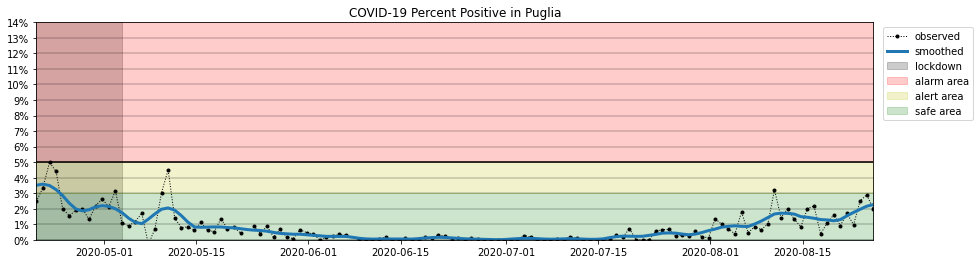

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.978199,2.264111
2020-08-24 17:00:00,2.892031,2.163057
2020-08-23 17:00:00,2.515244,1.963537
2020-08-22 17:00:00,0.968736,1.763731
2020-08-21 17:00:00,1.694095,1.545599
2020-08-20 17:00:00,0.920387,1.301355
2020-08-19 17:00:00,1.612115,1.223275


***

# Sardegna

## Plot

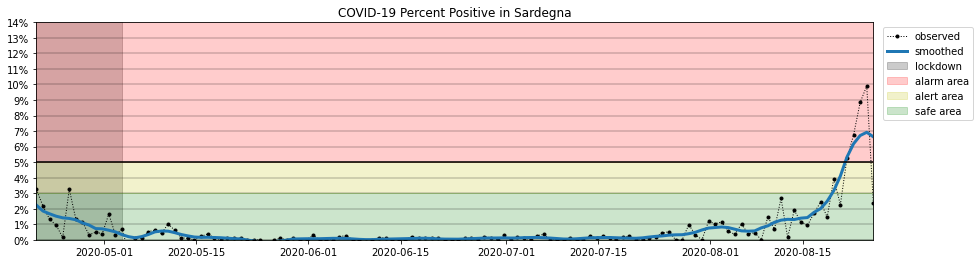

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,2.362752,6.630330
2020-08-24 17:00:00,9.902067,6.922390
2020-08-23 17:00:00,8.842795,6.713087
2020-08-22 17:00:00,6.748466,6.181378
2020-08-21 17:00:00,5.243446,5.324162
2020-08-20 17:00:00,2.261554,4.107040
2020-08-19 17:00:00,3.940362,3.160728


***

# Sicilia

## Plot

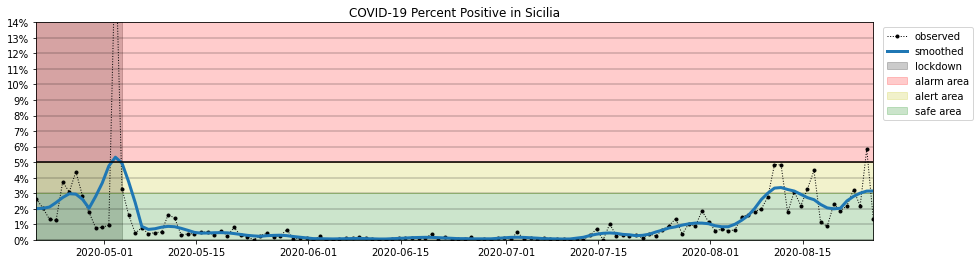

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.312910,3.142078
2020-08-24 17:00:00,5.850585,3.136944
2020-08-23 17:00:00,2.169870,3.002894
2020-08-22 17:00:00,3.230148,2.796600
2020-08-21 17:00:00,2.191235,2.504897
2020-08-20 17:00:00,1.883910,2.030731
2020-08-19 17:00:00,2.293578,1.995075


***

# Toscana

## Plot

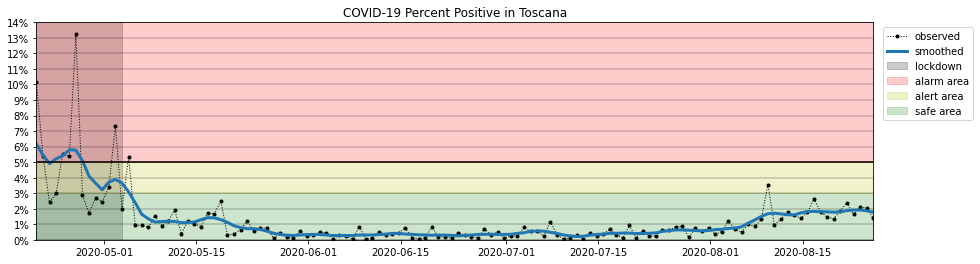

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.382676,1.779847
2020-08-24 17:00:00,2.075472,1.866685
2020-08-23 17:00:00,2.084069,1.917191
2020-08-22 17:00:00,1.631271,1.915163
2020-08-21 17:00:00,2.388150,1.883711
2020-08-20 17:00:00,1.868863,1.797929
2020-08-19 17:00:00,1.364256,1.778329


***

# Umbria

## Plot

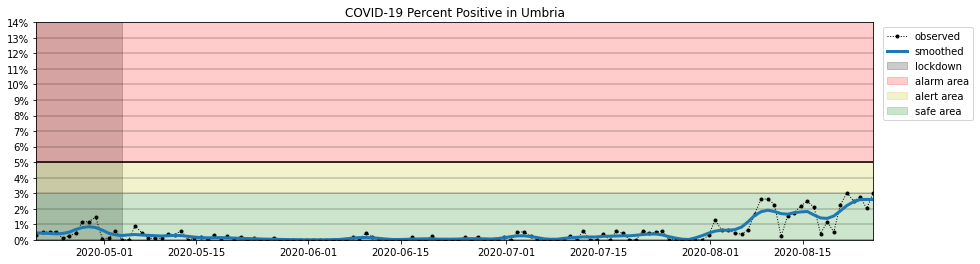

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,3.033473,2.590499
2020-08-24 17:00:00,2.022059,2.600673
2020-08-23 17:00:00,2.733813,2.587656
2020-08-22 17:00:00,2.503477,2.447815
2020-08-21 17:00:00,3.026135,2.208278
2020-08-20 17:00:00,2.251656,1.859793
2020-08-19 17:00:00,0.503145,1.530451


***

# Valle d'Aosta

## Plot

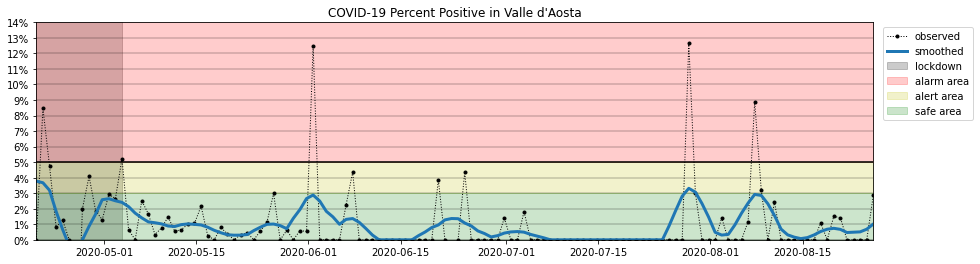

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,2.857143,1.015447
2020-08-24 17:00:00,0.000000,0.682170
2020-08-23 17:00:00,0.000000,0.510547
2020-08-22 17:00:00,0.000000,0.493208
2020-08-21 17:00:00,0.000000,0.469552
2020-08-20 17:00:00,1.428571,0.671769
2020-08-19 17:00:00,1.503759,0.739891


***

# Veneto

## Plot

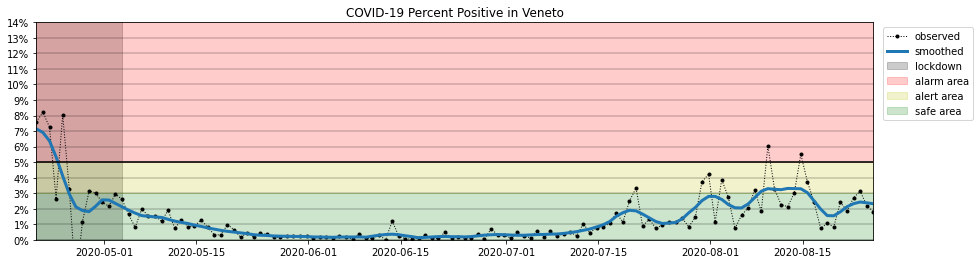

## Last week

,observed PP,smoothed PP
date,,
2020-08-25 17:00:00,1.806589,2.320188
2020-08-24 17:00:00,2.203229,2.381555
2020-08-23 17:00:00,3.135813,2.432806
2020-08-22 17:00:00,2.696326,2.326664
2020-08-21 17:00:00,1.855406,2.127526
2020-08-20 17:00:00,2.423780,1.802595
2020-08-19 17:00:00,0.838783,1.546740


***

In [57]:
latest = {
    "region": [],
    "observed PP": [],
    "smoothed PP": []
}

for region in countries:
    display(Markdown(f"# {region}"))
    ok = ko.loc[region]
    
    indice = ok['nuovi_positivi'][1:]*100 / ok['casi_testati'].diff()[1:]
    smooth = indice.rolling(7,
                    win_type='gaussian',
                    min_periods=1,
                    center=True).mean(std=2).values

    latest["region"].append(region)
    latest["observed PP"].append(indice[-1])
    latest["smoothed PP"].append(smooth[-1])
    
    display(Markdown(f"## Plot"))
    fig, ax = plt.subplots(figsize=(15, 4))

    ax.plot(indice, 'ok:', label="observed", lw=1, ms=3)
    ax.plot(indice.index, smooth, lw=3, label="smoothed")

    ax.axhline(0, c="k", alpha=.2)
    ax.hlines(np.arange(0,15,1), indice.index[0], indice.index[-1], color="k", alpha=.2)

    ax.axhline(5, c="k")

    ax.fill_betweenx(
        [0,20],
        indice.index[indice.index>=pd.to_datetime("2020-03-11")][0],
        indice.index[indice.index<=pd.to_datetime("2020-05-04")][-1],
        color="k", alpha=.2, label="lockdown"
    )

    ax.fill_between(indice.index, 5, 20, color="r", alpha=.2, label="alarm area")
    ax.fill_between(indice.index, 3, 5, color="y", alpha=.2, label="alert area")
    ax.fill_between(indice.index, 0, 3, color="g", alpha=.2, label="safe area")


    ax.set_yticks(np.arange(0,15,1))
    ax.set_yticklabels([f"{p:.0%}" for p in np.arange(0,.15,.01)])
    ax.set_ylim(0, 14)
    ax.set_xlim(indice.index[0], indice.index[-1])
    ax.legend(loc="upper right", bbox_to_anchor=(1.125,1))
    ax.set_title(f"COVID-19 Percent Positive in {region}")
    plt.show()
    plt.close(fig="all")
    
    display(Markdown(f"## Last week"))
    idf = pd.DataFrame({
        "date":indice.index[-7:],
        "observed PP":indice.values[-7:],
        "smoothed PP":smooth[-7:]
    })
    idf.set_index('date', inplace=True)
    display(HTML(idf[::-1].to_html()))
    display(Markdown("***"))

# SUMMARY

In [60]:
ldf = pd.DataFrame(latest)
ldf.set_index('region', inplace=True)

In [61]:
display(HTML(ldf.to_html()))

,observed PP,smoothed PP
region,,
Abruzzo,1.923077,2.358158
Basilicata,0.597610,21.855639
Calabria,0.547196,0.484098
Campania,4.454487,3.958527
Emilia-Romagna,1.476602,2.384369
Friuli Venezia Giulia,5.142857,2.586645
Lazio,1.743902,2.674845
Liguria,1.342282,2.831700
Lombardia,1.672993,1.914097


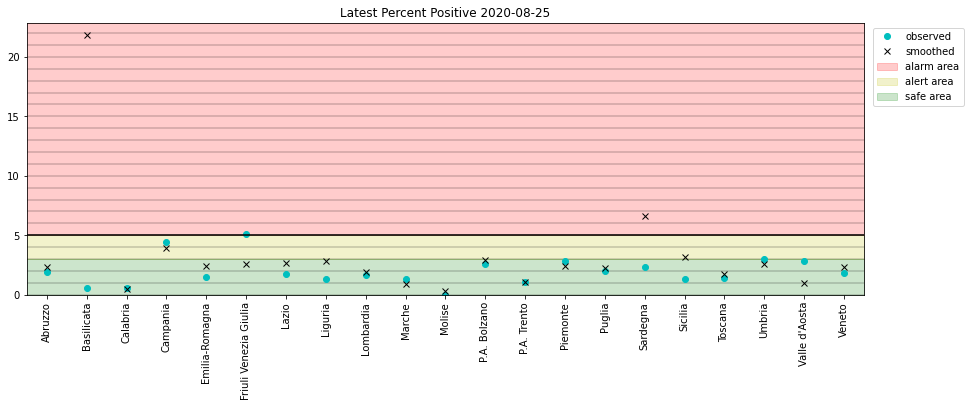

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))

ymax = max(ldf['observed PP'].max(), ldf['smoothed PP'].max())+1

ax.plot(ldf.index, ldf['observed PP'], 'oc', lw=0, label="observed")
ax.plot(ldf.index, ldf['smoothed PP'], 'xk', lw=0, label="smoothed")

ax.set_xticks(np.arange(countries.size))
ax.set_xticklabels(countries.values, rotation=90)

ax.hlines(np.arange(0,ymax,1), -1, countries.size+1, color="k", alpha=.2)

ax.axhline(5, c="k")

ax.fill_between([-1, countries.size+1], 5, ymax, color="r", alpha=.2, label="alarm area")
ax.fill_between([-1, countries.size+1], 3, 5, color="y", alpha=.2, label="alert area")
ax.fill_between([-1, countries.size+1], 0, 3, color="g", alpha=.2, label="safe area")

ax.set_xlim(-.5, countries.size-.5)
ax.set_ylim(0, ymax)

ax.legend(loc="upper right", bbox_to_anchor=(1.125,1))

ax.set_title(f"Latest Percent Positive {days[-1].date()}")
plt.show();

In [38]:
_ = """indice = ok['totale_casi'][1:]*100 / ok['casi_testati'][1:]
smooth = indice.rolling(7,
                win_type='gaussian',
                min_periods=1,
                center=True).mean(std=2).values

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(indice, 'ok:', label="observed", lw=1, ms=3)
ax.plot(indice.index, smooth, lw=3, label="smoothed")

ax.axhline(0, c="k", alpha=.2)
ax.hlines(np.arange(0,15,1), indice.index[0], indice.index[-1], color="k", alpha=.2)

ax.axhline(5, c="k")

ax.fill_betweenx(
    [0,20],
    indice.index[indice.index>=pd.to_datetime("2020-03-11")][0],
    indice.index[indice.index<=pd.to_datetime("2020-05-04")][-1],
    color="k", alpha=.2, label="lockdown"
)

ax.fill_between(indice.index, 5, 20, color="r", alpha=.2, label="alarm area")
ax.fill_between(indice.index, 3, 5, color="y", alpha=.2, label="alert area")
ax.fill_between(indice.index, 0, 3, color="g", alpha=.2, label="safe area")


ax.set_yticks(np.arange(0,15,1))
ax.set_yticklabels([f"{p:.0%}" for p in np.arange(0,.15,.01)])
ax.set_ylim(0, 30)
ax.set_xlim(indice.index[0], indice.index[-1])
ax.legend(loc="upper right", bbox_to_anchor=(1.125,1))
ax.set_title("COVID-19 Percent Positive in Italy")
plt.plot();"""